In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("atp_tennis.csv", encoding='utf-8')

In [4]:
df.drop_duplicates

<bound method DataFrame.drop_duplicates of                                Tournament        Date         Series    Court  \
0      Australian Hardcourt Championships  2000-01-03  International  Outdoor   
1      Australian Hardcourt Championships  2000-01-03  International  Outdoor   
2      Australian Hardcourt Championships  2000-01-03  International  Outdoor   
3      Australian Hardcourt Championships  2000-01-03  International  Outdoor   
4      Australian Hardcourt Championships  2000-01-03  International  Outdoor   
...                                   ...         ...            ...      ...   
63695                             US Open  2024-09-04     Grand Slam  Outdoor   
63696                             US Open  2024-09-05     Grand Slam  Outdoor   
63697                             US Open  2024-09-06     Grand Slam  Outdoor   
63698                             US Open  2024-09-07     Grand Slam  Outdoor   
63699                             US Open  2024-09-08     Grand Sl

In [5]:
atp_clean= df.drop(["Pts_1", "Pts_2", "Odd_1", "Odd_2"], axis=1)

In [6]:
atp_clean.head()

,Tournament,Date,Series,Court,Surface,Round,Best of,Player_1,Player_2,Winner,Rank_1,Rank_2,Score
0,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Dosedel S.,Ljubicic I.,Dosedel S.,63,77,6-4 6-2
1,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Clement A.,Enqvist T.,Enqvist T.,56,5,3-6 3-6
2,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Escude N.,Baccanello P.,Escude N.,40,655,6-7 7-5 6-3
3,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Knippschild J.,Federer R.,Federer R.,87,65,1-6 4-6
4,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Fromberg R.,Woodbridge T.,Fromberg R.,81,198,7-6 5-7 6-4


In [7]:
# A function that just determines which rank is higher. 
# In tennis a higher rank means a lower number, so the function looks for the lower number between the ranking columns.


def rank_winner(row):
    if row["Rank_1"] < row["Rank_2"]:
        return 1
    else:
        return 2

rank_winner(atp_clean.iloc[0])

# output of 1 means rank 1 was higher and vice versa

1

In [8]:
# A function that gets the higher ranking players name
def rank_to_player(row):

    if (rank_winner(row) == 1 and row["Winner"] == row ["Player_1"]) or (rank_winner(row) == 2 and row["Winner"] == row["Player_2"]):
        higher_rank_won= True
    else:
        higher_rank_won= False

    return higher_rank_won

rank_to_player(atp_clean.iloc[50])

False

In [9]:
# Creating a new column that says True if the higher ranking player won
atp_clean['Higher_Rank_Won'] = atp_clean.apply(rank_to_player, axis=1)

In [10]:
atp_clean.head()

,Tournament,Date,Series,Court,Surface,Round,Best of,Player_1,Player_2,Winner,Rank_1,Rank_2,Score,Higher_Rank_Won
0,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Dosedel S.,Ljubicic I.,Dosedel S.,63,77,6-4 6-2,True
1,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Clement A.,Enqvist T.,Enqvist T.,56,5,3-6 3-6,True
2,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Escude N.,Baccanello P.,Escude N.,40,655,6-7 7-5 6-3,True
3,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Knippschild J.,Federer R.,Federer R.,87,65,1-6 4-6,True
4,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Fromberg R.,Woodbridge T.,Fromberg R.,81,198,7-6 5-7 6-4,True


In [11]:
atp_clean['Date'] = pd.to_datetime(atp_clean['Date'])


atp_clean['Year'] = atp_clean['Date'].dt.year

In [12]:
# Calculate the percentages of Underdog wins per year
def percentages(year):
    if year:
        data = atp_clean[atp_clean['Year'] == year]  # Filter by the specified year
    else:
        data = atp_clean  # Use the whole dataset if no year is specified
        
    percentages = data['Higher_Rank_Won'].value_counts(normalize=True) * 100
    return percentages

In [13]:
percentages(2022)

Higher_Rank_Won
True     64.282908
False    35.717092
Name: proportion, dtype: float64

In [14]:
false_percentages = atp_clean.groupby('Year')['Higher_Rank_Won'].apply(lambda x: (x == False).mean() * 100)

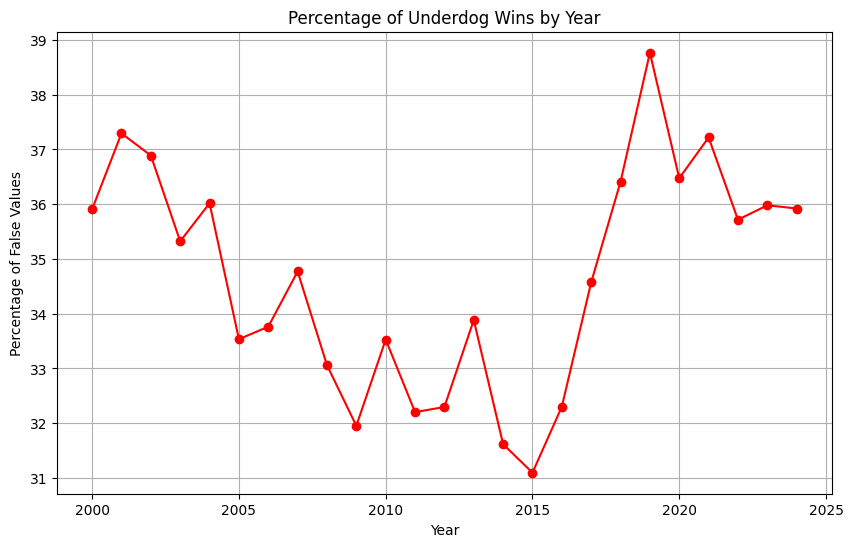

In [21]:
plt.figure(figsize=(10, 6))
false_percentages.plot(kind='line', marker='o', linestyle='-', color='red')
    
plt.xlabel('Year')
plt.ylabel('Percentage of False Values')
plt.title('Percentage of Underdog Wins by Year')
plt.grid(True)
    
 
plt.show()


<Axes: title={'center': 'Court Surface Type Breakdown in Underdog Matches '}>

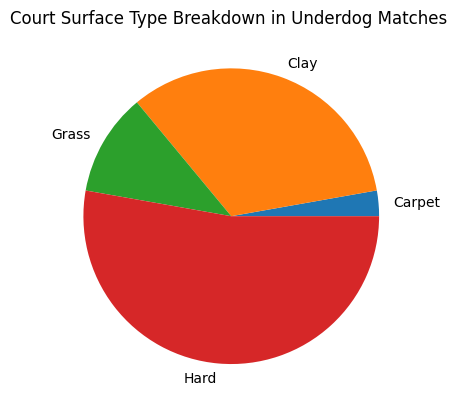

In [22]:
# Court surface type within underdog wins 

false_data_unsorted = atp_clean[atp_clean['Higher_Rank_Won'] == False]

surface_type_counts = false_data_unsorted.groupby('Surface').size()

surface_type_counts.plot(kind="pie", title="Court Surface Type Breakdown in Underdog Matches ")

<Axes: title={'center': 'Court Surface Type Breakdown of All ATP Matches'}>

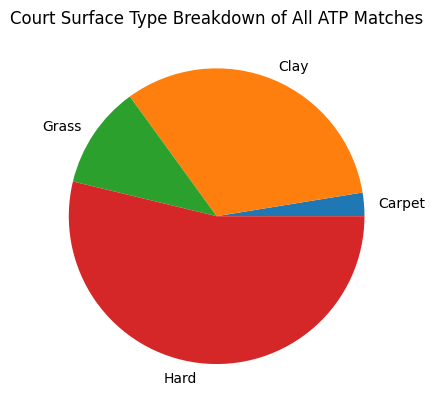

In [23]:
all_surface_type_count= atp_clean.groupby('Surface').size()
all_surface_type_count.plot(kind="pie", title= "Court Surface Type Breakdown of All ATP Matches")

In [18]:
grand_slam_matches = atp_clean[atp_clean['Series'] == 'Grand Slam']

grand_slam_matches.size

180480

In [19]:
false_grand_slam = grand_slam_matches.groupby('Year')['Higher_Rank_Won'].apply (lambda x: (x == False).mean() * 100)

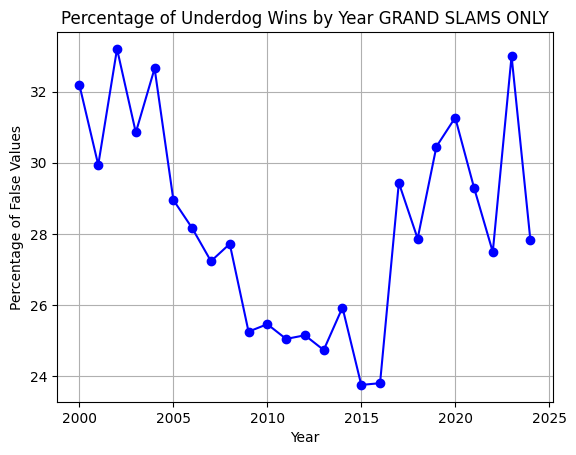

In [24]:
false_grand_slam.plot(kind='line', marker='o', linestyle='-', color='blue')
    
plt.xlabel('Year')
plt.ylabel('Percentage of False Values')
plt.title('Percentage of Underdog Wins by Year GRAND SLAMS ONLY')
plt.grid(True)
    
 
plt.show()
